### Image Processing and FFT

This Jupyter notebook demonstrates the application of the Fast Fourier Transform (FFT) in image processing, showcasing both the transformation of a 2D grayscale image into the frequency domain and its subsequent reconstruction through inverse FFT. Initially, the notebook reads and converts an image to grayscale, then applies row-wise and column-wise FFTs, visualizing the frequency components at each step. This is followed by a full 2D FFT to analyze the frequency domain representation of the image. To illustrate image compression, we implement thresholding by selectively retaining significant frequency components, showcasing the lossy compression capabilities of the FFT. Additionally, the notebook delves into the mathematical computation of a Fourier series on a simple 'hat' function, contrasting the discrete, image-based FFT with the continuous representation of a function via its Fourier series.

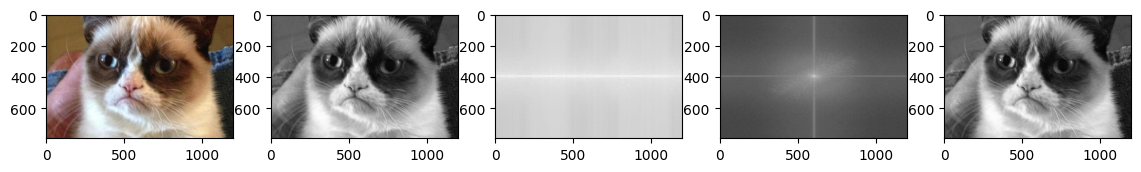

In [9]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Read and display the image
A = Image.open('../../data/grumpy.jpg')
plt.figure(figsize=(14,6))
plt.subplot(1, 5, 1)
plt.imshow(A)

# Convert to grayscale and display
B = A.convert('L')
plt.subplot(1, 5, 2)
plt.imshow(B, cmap='gray')

# Row-wise FFT and display
C = np.fft.fft2(B, axes=[0])
Cshift = np.fft.fftshift(C, axes=[0])
plt.subplot(1, 5, 3)
plt.imshow(np.log(np.abs(Cshift)), cmap='gray')

# Column-wise FFT and display
D = np.fft.fft2(C, axes=[1])
Dshift = np.fft.fftshift(D)
plt.subplot(1, 5, 4)
plt.imshow(np.log(np.abs(Dshift)), cmap='gray')

# 2D FFT and Inverse FFT
D2 = np.fft.fft2(B)
Brec = np.fft.ifft2(D2).real
plt.subplot(1, 5, 5)
plt.imshow(Brec, cmap='gray')


Code above applies a 2D FFT row-wise to the grayscale image. This transformation converts spatial domain data into frequency domain data. `fftshift` is used to center the zero frequencies and for graphing purpose for this context.

To provide a mathematical representation for the steps involving the Fast Fourier Transform (FFT) and its shifting, we need to first understand the mathematical basis of the FFT and the shifting operation. To break down each step with its corresponding mathematical formula:

### 1. Row-wise FFT: `C = np.fft.fft2(B, axes=[0])`

For an image $ B $ of size $ M \times N $, the row-wise FFT (applying FFT along the rows) is given by:

$$ C_{mn} = \sum_{x=0}^{M-1} B_{xn} e^{-2\pi i mx/M}, \quad m = 0, 1, \ldots, M-1; \, n = 0, 1, \ldots, N-1 $$

### 2. Row-wise FFT Shift: `Cshift = np.fft.fftshift(C, axes=[0])`

The FFT shift operation centers the zero-frequency component. This is applied for graphing purpose as mentioned previously for the current context. Mathematically, for the row-wise shift:

$$ C\text{shift}_{mn} = C_{(m+M/2)\%M, n}, \quad m = 0, 1, \ldots, M-1; \, n = 0, 1, \ldots, N-1 $$

### 3. Column-wise FFT on Row-wise FFT: `D = np.fft.fft2(C, axes=[1])`

This step applies FFT along the columns of the already transformed matrix $ C $. The formula for this operation is:

$$ D_{mn} = \sum_{y=0}^{N-1} C_{my} e^{-2\pi i ny/N}, \quad m = 0, 1, \ldots, M-1; \, n = 0, 1, \ldots, N-1 $$


### 5. Full 2D FFT: `D2 = np.fft.fft2(B)`

The 2D FFT on the grayscale image $ B $ is given by:

$$ D2_{mn} = \sum_{x=0}^{M-1} \sum_{y=0}^{N-1} B_{xy} e^{-2\pi i (mx/M + ny/N)}, \quad m = 0, 1, \ldots, M-1; \, n = 0, 1, \ldots, N-1 $$

### 6. Inverse 2D FFT: `Brec = np.fft.ifft2(D2).real`

The inverse FFT (IFFT) is used to convert the frequency domain data back to the spatial domain:

$$ B\text{rec}_{xy} = \frac{1}{MN} \sum_{m=0}^{M-1} \sum_{n=0}^{N-1} D2_{mn} e^{2\pi i (mx/M + ny/N)}, \quad x = 0, 1, \ldots, M-1; \, y = 0, 1, \ldots, N-1 $$

In these equations, $ i $ is the imaginary unit, and $ \% $ denotes the modulo operation. The FFT operations convert the spatial information (image pixels) into the frequency domain, which is useful for many image processing applications like filtering and compression. The inverse FFT (IFFT) then reconstructs the spatial domain data from its frequency representation.

If you are like me and learning about Fourier Transformations newly, you might question: Wait why aren't we using this equation: 

$$ f(x) = \frac{a_0}{2} + \sum_{k=1}^{\infty} \left( a_k \cos\left(\frac{k\pi x}{L}\right) + b_k \sin\left(\frac{k\pi x}{L}\right) \right) $$

Which is essentially what we do actually:

 $ e^{-2\pi i mx/M} $ is the exponential form used in the Fourier Transform. 

1. **Euler's Formula:**
   Euler's formula states that $ e^{ix} = \cos(x) + i\sin(x) $, where $ i $ is the imaginary unit. This formula shows that complex exponentials can be expressed in terms of sines and cosines.

2. **Fourier Transform using Exponentials:**
   The Fourier Transform, particularly in its discrete form (DFT), often uses the exponential form for computational efficiency and mathematical elegance. The exponential form compactly represents both the sine and cosine terms. The DFT of a sequence $ B $ is given by:
   $$ \hat{B}_m = \sum_{x=0}^{M-1} B_{x} e^{-2\pi i mx/M} $$
   In this context, $ \hat{B}_m $ represents the frequency domain representation of $ B $.

3. **Relation to Sines and Cosines:**
   Breaking down the exponential term using Euler's formula, we get:
   $$ e^{-2\pi i mx/M} = \cos(2\pi mx/M) - i\sin(2\pi mx/M) $$
   This means the real part of the Fourier Transform corresponds to the cosine terms, and the imaginary part corresponds to the sine terms. So, the exponential notation is a more concise way to include both sine and cosine components.

4. **Advantages in Computation:**
   Using exponentials is particularly advantageous in algorithms like the Fast Fourier Transform (FFT). The FFT algorithm benefits from the properties of complex exponentials, such as their periodicity and the ease of multiplying complex numbers, leading to more efficient computations compared to handling sines and cosines separately.

In summary, while the foundational concept of the Fourier Transform involves decomposing signals into sines and cosines, the use of exponential notation in the DFT and FFT is a more efficient and mathematically elegant method that implicitly encompasses both sine and cosine terms.





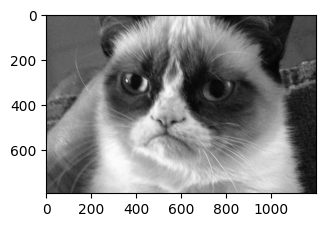

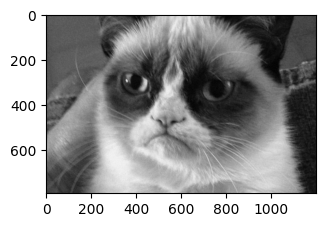

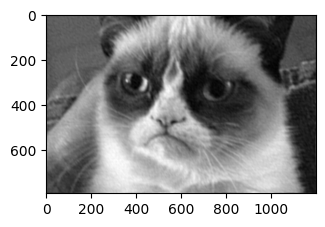

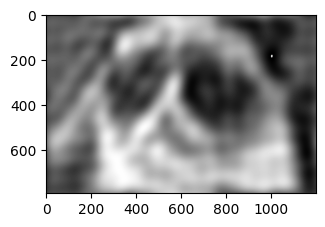

In [13]:

# Thresholding and display
Dsorted = np.sort(np.abs(D2.flatten()))
j = 0
for keep in [0.5, 0.05, 0.01, 0.0002]:
    j += 1
    tol = Dsorted[int(np.floor((1 - keep) * len(Dsorted)))]
    ind = np.abs(D2) > tol
    Dlow = D2 * ind
    Blow = np.fft.ifft2(Dlow).real
    Blow = np.uint8(Blow / Blow.max() * 255)
    plt.figure(figsize=(16,8))
    plt.subplot(1, 4, j )
    plt.imshow(Blow, cmap='gray')


plt.show()


Lets investiage what we did in our last code:

 The thresholding process demonstrated in the code can be mathematically represented as follows. This process is a form of image compression where only a certain percentage of the highest magnitude frequency components are retained.

1. **Sorting and Threshold Calculation:**
   The 2D FFT of the image, represented as $ D2 $, is flattened and its absolute values are sorted. This sorted array is denoted as $ D\text{sorted} $.

   For each threshold ratio $ \text{keep} \in \{0.5, 0.05, 0.01, 0.0002\} $, the threshold $ \text{tol} $ is calculated as:
   $$ \text{tol} = D\text{sorted}\left[\left\lfloor(1 - \text{keep}) \times \text{len}(D\text{sorted})\right\rfloor\right] $$
   where $ \lfloor \cdot \rfloor $ denotes the floor function.

2. **Applying the Threshold:**
   A binary mask $ \text{ind} $ is created, where each element is determined by:
   $$ \text{ind}_{ij} = 
      \begin{cases} 
      1, & \text{if } \left|D2_{ij}\right| > \text{tol} \\
      0, & \text{otherwise}
      \end{cases}
   $$
   for all $ i, j $ indices of the matrix $ D2 $.

3. **Creating the Compressed Frequency Matrix:**
   The compressed frequency representation $ D\text{low} $ is obtained by element-wise multiplication of $ D2 $ and $ \text{ind} $:
   $$ D\text{low}_{ij} = D2_{ij} \cdot \text{ind}_{ij} $$

4. **Inverse FFT and Image Reconstruction:**
   The compressed image $ B\text{low} $ is then reconstructed by applying the inverse FFT to $ D\text{low} $ and taking the real part:
   $$ B\text{low} = \text{Real}(\text{IFFT2}(D\text{low})) $$
   The values of $ B\text{low} $ are then normalized and converted to 8-bit integers for display.

This thresholding technique effectively demonstrates a basic form of frequency-based image compression, where retaining only a fraction of the highest magnitude frequencies can still reconstruct a recognizable image, albeit with some loss of quality proportional to the reduction in data.



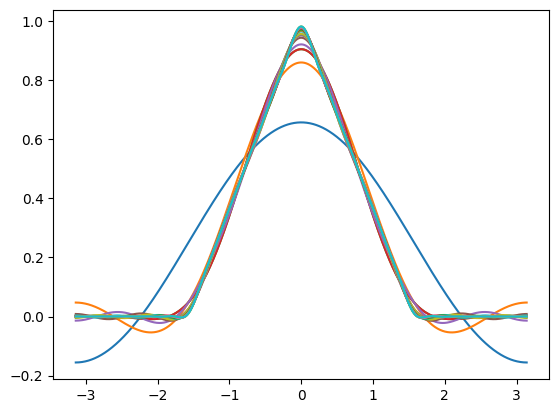

In [22]:
#Define domain
dx = 0.001
L = np.pi
x = L * np.arange(-1+dx,1+dx,dx)
n = len(x)
nquart = int(np.floor(n/4))
# Define hat function
f = np.zeros_like(x)
f[nquart:2*nquart] = (4/n)*np.arange(1,nquart+1)
f[2*nquart:3*nquart] = np.ones(nquart) - (4/n)*np.arange(0,
nquart)
# Compute Fourier series
A0 = np.sum(f * np.ones_like(x)) * dx
fFS = A0/2
A = np.zeros(20)
B = np.zeros(20)
for k in range(20):
    A[k] = np.sum(f * np.cos(np.pi*(k+1)*x/L)) * dx 
    # Inner product
    B[k] = np.sum(f * np.sin(np.pi*(k+1)*x/L)) * dx
    fFS = fFS + A[k]*np.cos((k+1)*np.pi*x/L) + B[k]*np.sin((
    k+1)*np.pi*x/L)
    plt.plot(x,fFS,'-')

In above code, we take a look at fourier transform in different way. This code calculates the Fourier series of a piecewise linear function, commonly referred to as a "hat" function, on a defined domain. Let's break down the mathematical representation of each step in the code.

### 1. Defining the Domain and the Hat Function:

The domain is defined by an array $ x $ with values ranging from $ -\pi $ to $ \pi $ (since $ L = \pi $) with a step size $ dx = 0.001 $. The hat function $ f(x) $ is defined on this domain as:

$$ f(x) = 
   \begin{cases} 
      \frac{4}{n}(x - n_{\text{quart}}), & \text{for } n_{\text{quart}} \leq x < 2n_{\text{quart}} \\
      1 - \frac{4}{n}(x - 2n_{\text{quart}}), & \text{for } 2n_{\text{quart}} \leq x < 3n_{\text{quart}} \\
      0, & \text{otherwise}
   \end{cases}
$$
where $ n_{\text{quart}} $ is a quarter of the total number of points in the domain.

### 2. Computing the Fourier Series:

The Fourier series of a function $ f(x) $ is given by the sum of sinusoids:

$$ f_{\text{FS}}(x) = \frac{A_0}{2} + \sum_{k=1}^{\infty} \left[ A_k \cos\left(\frac{k\pi x}{L}\right) + B_k \sin\left(\frac{k\pi x}{L}\right) \right] $$

where $ A_0 $, $ A_k $, and $ B_k $ are the Fourier coefficients.

#### a. Zeroth Coefficient $ A_0 $:

$$ A_0 = \frac{1}{L} \int_{-L}^{L} f(x) \, dx $$

In the code, this is approximated by the discrete sum:

$$ A_0 = \sum f(x) \cdot dx $$

#### b. Coefficients $ A_k $ and $ B_k $:

For $ k = 1, 2, \ldots, 20 $:

$$ A_k = \frac{1}{L} \int_{-L}^{L} f(x) \cos\left(\frac{k\pi x}{L}\right) \, dx $$
$$ B_k = \frac{1}{L} \int_{-L}^{L} f(x) \sin\left(\frac{k\pi x}{L}\right) \, dx $$

Approximated in the code by:

$$ A_k = \sum f(x) \cdot \cos\left(\frac{k\pi x}{L}\right) \cdot dx $$
$$ B_k = \sum f(x) \cdot \sin\left(\frac{k\pi x}{L}\right) \cdot dx $$

#### c. Constructing the Fourier Series:

The Fourier series approximation $ f_{\text{FS}}(x) $ using the first 20 terms is calculated as:

$$ f_{\text{FS}}(x) = \frac{A_0}{2} + \sum_{k=1}^{20} \left[ A_k \cos\left(\frac{k\pi x}{L}\right) + B_k \sin\left(\frac{k\pi x}{L}\right) \right] $$

### 3. Plotting the Approximation:

Finally, the code plots the Fourier series approximation $ f_{\text{FS}}(x) $ over the domain $ x $. This visualizes how well the Fourier series approximates the hat function using a finite number of terms.
